Name : Janhavi Sachin Phulavare

Task 2 : Unemployment Analysis Using Python

Importing Libraries :

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
import plotly.express as px
import plotly.graph_objects as go


In [84]:
from google.colab import files
uploaded = files.upload()

Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020 (1).csv


1st 5 rows of data :

In [85]:
data = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [86]:
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [87]:
data.shape

(267, 9)

267 rows , 9 columns

In [88]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Information of data :

column names, non null count and data type of each column, total no of rows and columns

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Statistical Summary of data :

In [90]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


Checking for null values :

In [91]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

No null values.

Checking for duplicates :

In [92]:
data.duplicated().any()

False

No duplicated values.

Changing the names of columns :

In [93]:
data.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed','Estimated Labour Participation Rate', 'Region', 'Longitude', 'Latitude']

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   Longitude                            267 non-null    float64
 8   Latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Converting Date column datatype to datetime and frequency column to category :

In [95]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)
data['Frequency'] = data['Frequency'].astype('category')

Extracting Month and Month Name from the Date :

In [96]:
data['Month']=data['Date'].dt.month
data['Month_int'] = data['Month'].apply(lambda x: int(x))
data['Month_name'] = data['Month_int'].apply(lambda x: calendar.month_abbr[x])

Extracting Year From Date :

In [97]:

data['Year']=data['Date'].dt.year

In [98]:
data.drop(columns='Month',inplace=True)

In [99]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name,Year
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan,2020
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb,2020
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar,2020
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr,2020
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May,2020


Statistics for Estimated Unemployment Rate, Estimated Employed, Estimated Labour Participation Rate :

In [100]:
df_stats = data[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']]
round(df_stats.describe(),2)

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,267.00,267.00,267.00
mean,12.24,13962105.72,41.68
std,10.80,13366318.36,7.85
min,0.50,117542.00,16.77
25%,4.84,2838930.50,37.26
50%,9.65,9732417.00,40.39
75%,16.76,21878686.00,44.06
max,75.85,59433759.00,69.69


Region wise Statistics :

In [101]:
region_statistics=data.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()
region_stats=round(region_statistics,2)
region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


Correlation Heatmap :

<ipython-input-102-54157f3b763a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

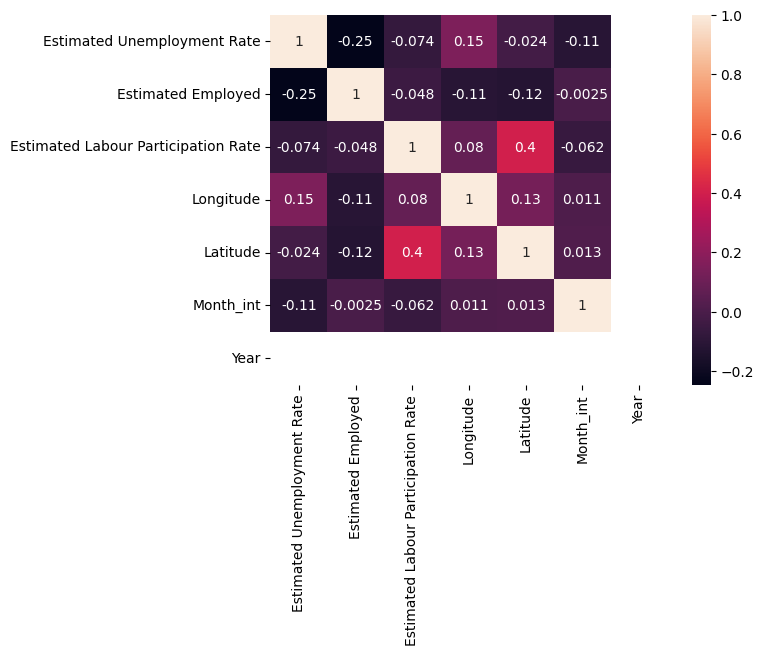

In [102]:
corr=data.corr()
sns.heatmap(corr,annot=True)

Bar graph for Estimated Unemployment Rate by Region :

Text(0.5, 1.0, 'Estimated Unemployment Rate by Region')

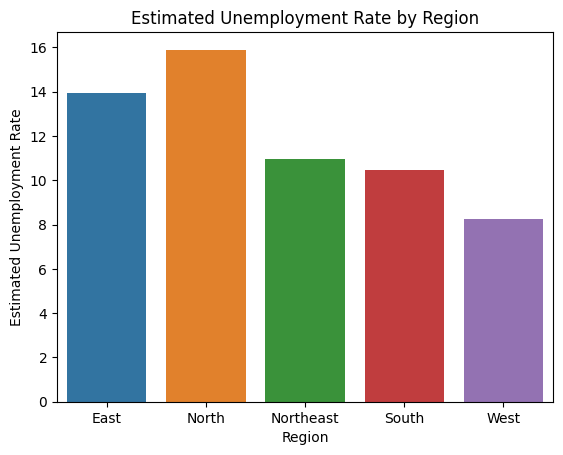

In [103]:
sns.barplot(x='Region',y='Estimated Unemployment Rate',data=region_stats)
plt.title('Estimated Unemployment Rate by Region')

North and East region have een affected most by unemployment.

Average Unemployment Rate in each state :

In [104]:
plot_ump = data[['Estimated Unemployment Rate', 'States']]
df_unemp = plot_ump.groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Estimated Unemployment Rate')
fig = px.bar(df_unemp, x='States', y='Estimated Unemployment Rate',
             title='Average Unemployment Rate in each state', template='plotly')
fig.update_traces(marker_color = '#f57067', marker_line_color = 'black',
                  marker_line_width = 1, opacity = 1)

fig.show()

Hariyana and Tripura were having the highest average amount of Unemployment rate

Meghalaya was having the lowest average amount of Unemployment rate

Bar plot of estimated employed citizen in every month :

In [105]:
fig = px.bar(data,x='Month_name',y='Estimated Employed',color='Month_name',

            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

Line Plot for Mean Estimated Unemployment Rate Over Time :

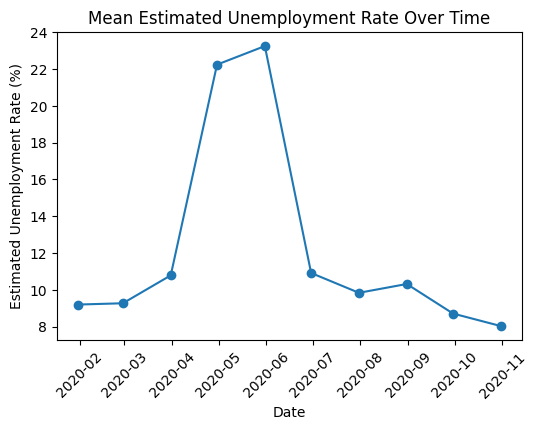

In [106]:
grouped = data.groupby('Date')['Estimated Unemployment Rate'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(grouped['Date'], grouped['Estimated Unemployment Rate'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Mean Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()

Unemployment rate peaked during May and June 2020 during Lockdown.

Lineplot for Mean Estimated Employment Rate Over Time

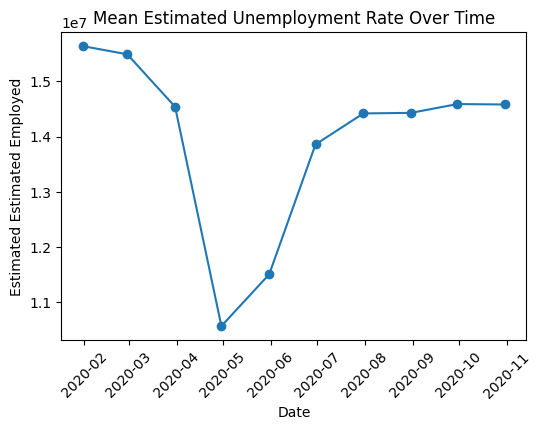

In [107]:
grouped = data.groupby('Date')['Estimated Employed'].mean().reset_index()
plt.figure(figsize=(6, 4))
plt.plot(grouped['Date'], grouped['Estimated Employed'], marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Estimated Employed')
plt.title('Mean Estimated Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.show()

Employement gradually decreased from April 2020 to May 2020 thereafter, started increasing slowly.

Data representation before and after lockdown

In [108]:

before_lockdown = data[(data['Month_int']>=1) &(data['Month_int'] <4)]
after_lockdown = data[(data['Month_int'] >=4) & (data['Month_int'] <=6)]

In [109]:
af_lockdown = after_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

lockdown = before_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['Estimated Unemployment Rate']

lockdown.columns = ['States','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,States,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,5.700000,13.750000
1,Assam,4.613333,7.070000
2,Bihar,12.110000,36.806667
3,Chhattisgarh,8.523333,9.380000
4,Delhi,18.036667,25.713333


Rate change in unemployment  :

In [110]:

lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                              /lockdown['unemployment rate after lockdown'],2)


In [111]:
fig = px.bar(lockdown,x='States',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown', template='ggplot2',
             color_continuous_scale='YlOrRd')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()

Most impacted states  :

Tripura
Haryana
Sikkim
Jammu and Kashmir
Delhi

Tree map for Estimated Unemployment Rate by Region and State :

In [112]:
hierarchical_df = data.groupby(['Region', 'States'])['Estimated Unemployment Rate'].mean().reset_index()

# Create an interactive treemap using Plotly Express
fig = px.treemap(hierarchical_df, path=['Region', 'States'], values='Estimated Unemployment Rate',
                 color='Estimated Unemployment Rate', hover_data=['Estimated Unemployment Rate'],
                 color_continuous_scale='Viridis')

# Add labels for Estimated_Unemployment_Rate values
fig.update_traces(textinfo="label+value")

# Customize the treemap layout
fig.update_layout(title='Interactive Treemap of Estimated Unemployment Rate by Region and State',
                  coloraxis_showscale=True)


Conclusion :

1. May and April Months has the highest estimated unemployment rate.
2. North Region has the highest estimted unemployment rate. East Region is at the second place.
3. In North Region Haryana has the highest estimated unemployment rate of 27.447.
4. In Northeast Region Tripura has the highest estimated unemployment rate of 25.055.
5. In South Region Puducherry has the highest estimated unemployment rate of 19.942.
6. In East Region Jharkhand has the highest estimated unemployment rate of 19,539.
7. In West Region Goa has the highest estimated unemployment rate of 12.167.